#Exploratory Data Analysis (EDA) Report

Project: Reddit Mental Health and COVID-19 (2020)

Period: February – September 2020

Topics: `covid19`, `coronavirus`, `depression`, `anxiety`, `offmychest`, `covid19_support`, `mentalhealthsupport`

Total records: 3 385 638

Columns: `id`, `author`, `subreddit`, `topic`, `month`, `event_time`, `text`, `text_len`, `score`

Time spent: 17 hours

Prepared by: Anastasiia Bakalyna and Anna Romanchuk

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
path = "/content/drive/MyDrive/Pushshift/final_dataset_small_all_v2.csv"
df = pd.read_csv(path)

df['created_utc'] = pd.to_datetime(df['created_utc'], utc=True, errors='coerce')
df['month'] = df['created_utc'].dt.to_period('M').astype(str)


/tmp/ipython-input-3621590473.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_utc'].dt.to_period('M').astype(str)


---

## Dataset Overview

In [37]:
df.shape

(350966, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350966 entries, 0 to 350965
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   id           350966 non-null  object             
 1   author       350966 non-null  object             
 2   subreddit    350966 non-null  object             
 3   created_utc  350966 non-null  datetime64[ns, UTC]
 4   month        350966 non-null  object             
 5   text         350960 non-null  object             
 6   text_len     350960 non-null  float64            
 7   score        350966 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 21.4+ MB


In [39]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,350966,350966,g6yksr4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,350966,123536,[deleted],54915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subreddit,350966,7,Coronavirus,262395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_utc,350966,NaN,NaN,NaN,2020-05-25 12:45:48.303505152+00:00,2020-02-01 00:00:40+00:00,2020-04-10 16:51:29.249999872+00:00,2020-05-13 23:55:17.500000+00:00,2020-07-12 10:14:28.500000+00:00,2020-09-30 23:58:47+00:00,NaN
month,350966,8,2020-04,101263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,350960,294541,[deleted],21717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text_len,350960.0,NaN,NaN,NaN,205.118429,1.0,36.0,107.0,254.0,10036.0,325.512015
score,350966.0,NaN,NaN,NaN,8.668786,-373.0,1.0,2.0,4.0,16930.0,88.31456


In [40]:
df['month'].value_counts().sort_index()

,count
month,
2020-02,32096
2020-03,14243
2020-04,101263
2020-05,57749
2020-06,38145
2020-07,50743
2020-08,32435
2020-09,24292


The data was collected from the Reddit platform (via the Pushshift API) for seven thematic communities:

* `r/COVID19` — posts about the pandemic, statistics, and quarantine;
* `r/coronavirus` — broad discussions about the spread of the virus, global updates, and public health responses;
* `r/depression` — discussions about depression and emotional well-being;
* `r/anxiety` — posts about anxiety, stress, and coping mechanisms;
* `r/offmychest` — honest personal stories and emotional disclosures;
* `r/covid19_support` — supportive conversations related to COVID-19 difficulties and personal challenges during the pandemic;
* `r/mentalhealthsupport` — general community support for a wide range of mental health issues.

Due to the absence of the `created_utc` column, the publication time was inferred from the filename (`RC_YYYY-MM.csv`), which allows analyzing trends at the monthly level.

---

##Reseach Questions

### 1. How did global posting activity evolve from February to September 2020?

### 2. Which subreddits were the most active?

### 3. How did each subreddit’s activity change month-by-month?

### 4. Which subreddits were the most stable or most volatile?

### 5. Which communities wrote the longest posts?

### 6. What does the overall text length distribution look like?

### 7. What is the relationship between text length and score?

### 8. Do longer posts tend to receive higher engagement?

### 9. How did the relative shares of topics evolve over time?

### 10. Who were the most active authors?

### 11. Are there temporal patterns within months?

### 12. Which subreddits experienced anomalous spikes in activity?

---

##Activity and Distribution

### 1. How did total posting activity change between February and September 2020?

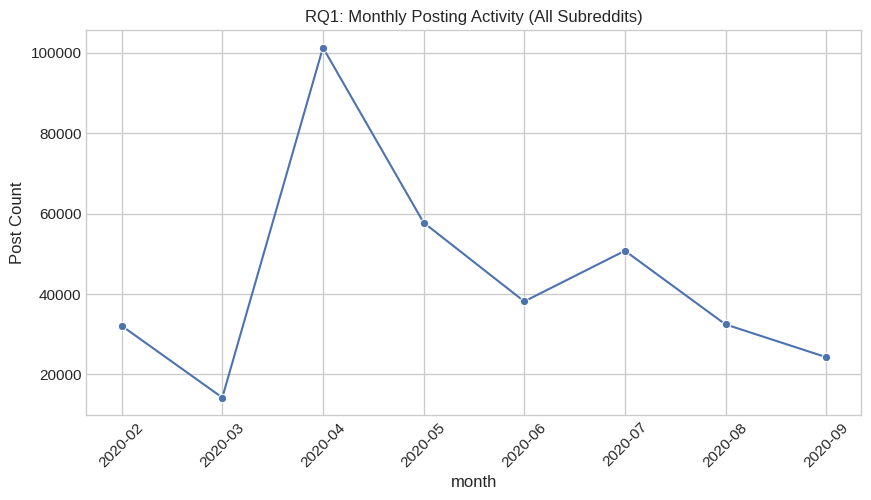

In [41]:
monthly = df.groupby("month")["id"].count().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x="month", y="id", marker="o")
plt.xticks(rotation=45)
plt.title("RQ1: Monthly Posting Activity (All Subreddits)")
plt.ylabel("Post Count")
plt.show()

### 2. Which subreddits were the most active and how large is each community?

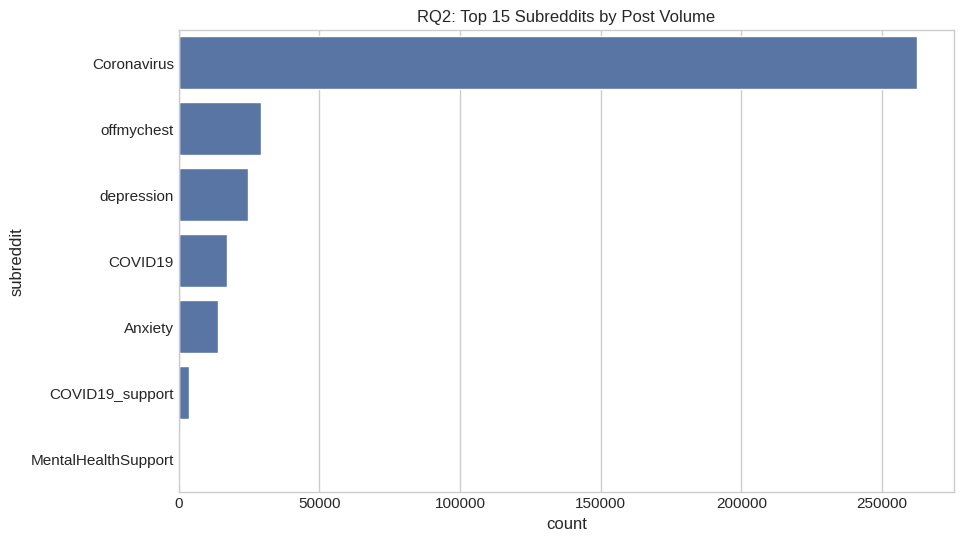

In [42]:
sub_counts = df['subreddit'].value_counts().reset_index()
sub_counts.columns = ["subreddit", "count"]

plt.figure(figsize=(10,6))
sns.barplot(data=sub_counts.head(15), x="count", y="subreddit")
plt.title("RQ2: Top 15 Subreddits by Post Volume")
plt.show()

### 3. How did the activity of each subreddit evolve month by month?

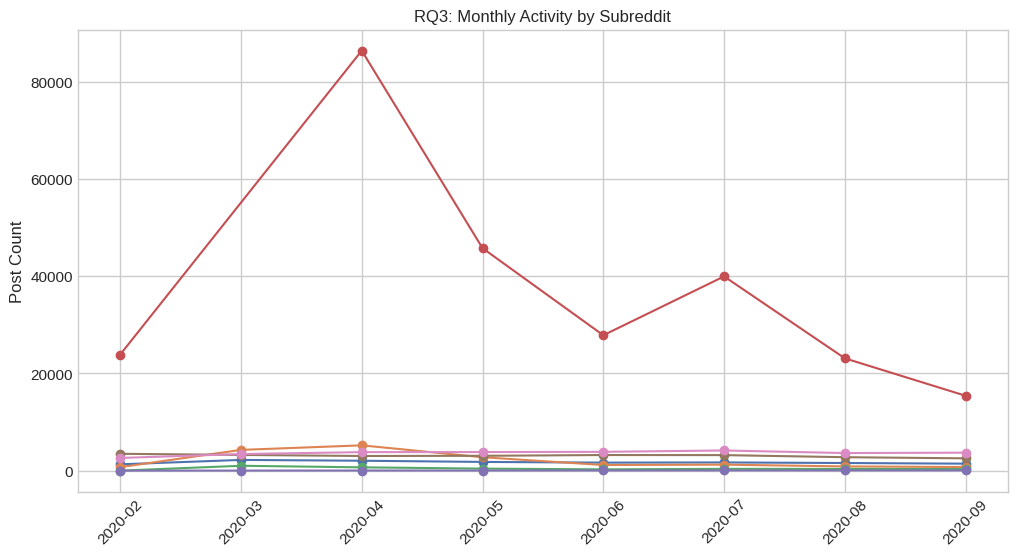

In [43]:
sub_month = df.groupby(["month", "subreddit"])["id"].count().reset_index()

plt.figure(figsize=(12,6))
for sub, subset in sub_month.groupby("subreddit"):
    plt.plot(subset["month"], subset["id"], marker="o")

plt.xticks(rotation=45)
plt.title("RQ3: Monthly Activity by Subreddit")
plt.ylabel("Post Count")
plt.show()

### 4. Which subreddits show the most stable and the most volatile activity?

In [44]:
stab = (
    df.groupby(["subreddit", "month"])["id"].count()
      .groupby("subreddit")
      .agg(["mean", "std"])
)

stab["cv"] = stab["std"] / stab["mean"]

stab_sorted = stab.sort_values("cv")

stab_sorted.head(10)  # most stable
stab_sorted.tail(10)  # most volatile

,mean,std,cv
subreddit,,,
depression,3075.500,293.313582,0.095371
offmychest,3641.375,461.004784,0.126602
Anxiety,1727.500,298.610114,0.172857
MentalHealthSupport,48.625,14.461155,0.297402
Coronavirus,37485.000,23936.674692,0.638567
COVID19_support,442.625,298.711011,0.674862
COVID19,2135.750,1759.565673,0.823863


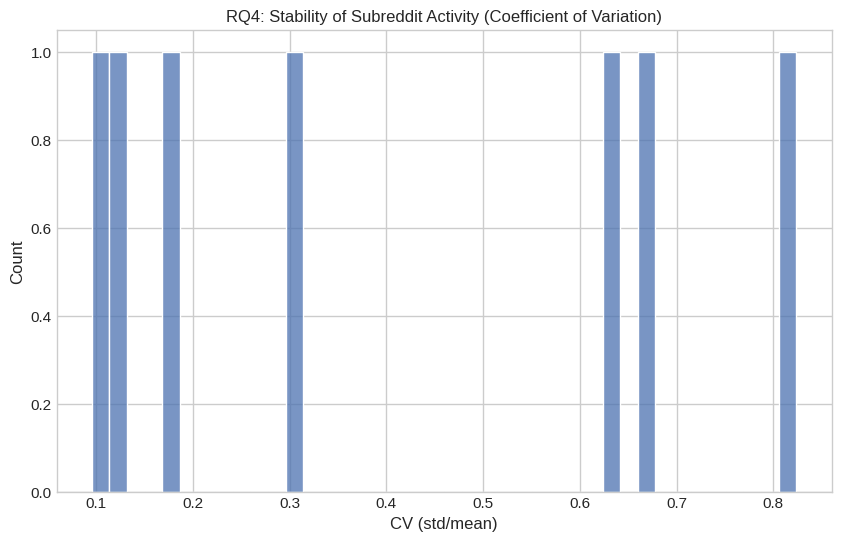

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(stab["cv"], bins=40)
plt.title("RQ4: Stability of Subreddit Activity (Coefficient of Variation)")
plt.xlabel("CV (std/mean)")
plt.show()

### 5. Which subreddits produce the longest posts?

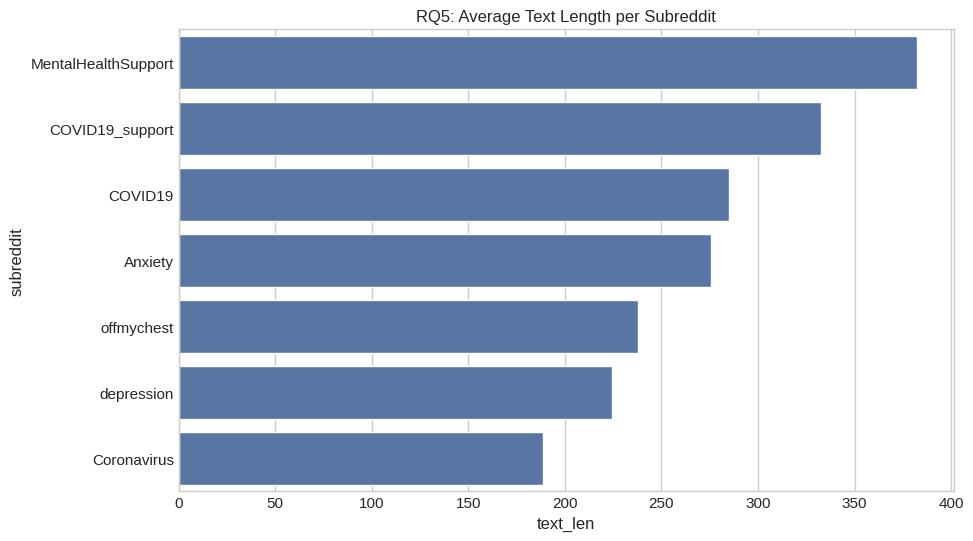

In [46]:
avg_len = df.groupby("subreddit")["text_len"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_len.sort_values("text_len", ascending=False).head(15),
            x="text_len", y="subreddit")
plt.title("RQ5: Average Text Length per Subreddit")
plt.show()

### 6. What is the distribution of text lengths in the whole dataset?

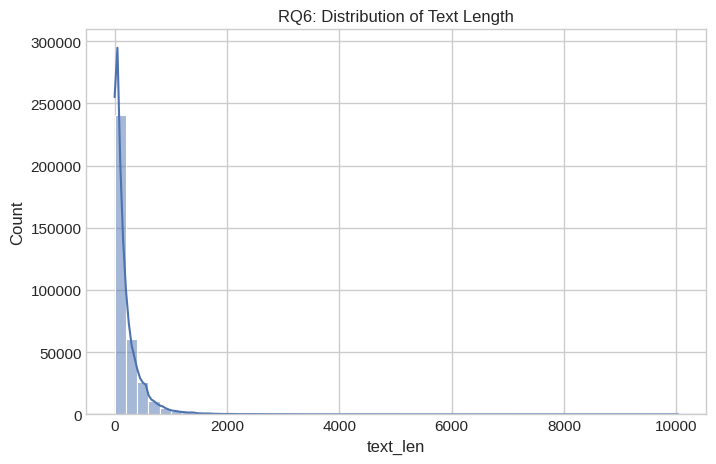

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df["text_len"], bins=50, kde=True)
plt.title("RQ6: Distribution of Text Length")
plt.show()

### 7. What is the relationship between post length and user engagement (score)?

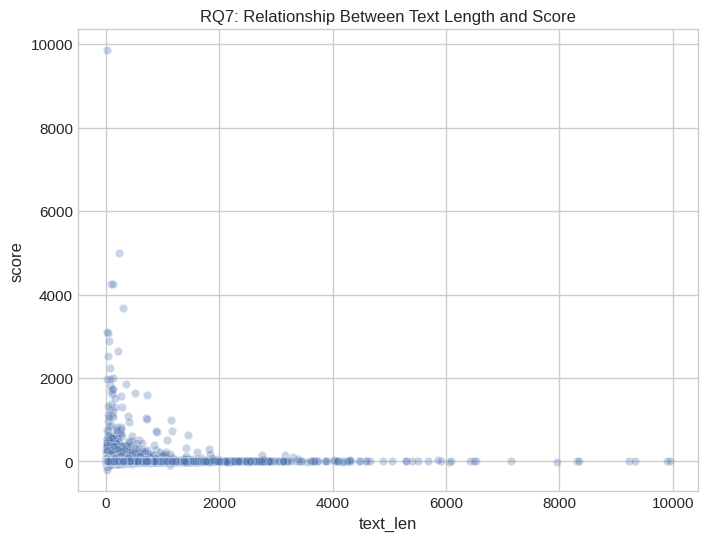

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(50000), x="text_len", y="score", alpha=0.3)
plt.title("RQ7: Relationship Between Text Length and Score")
plt.show()

### 8. Do longer posts receive higher average score?

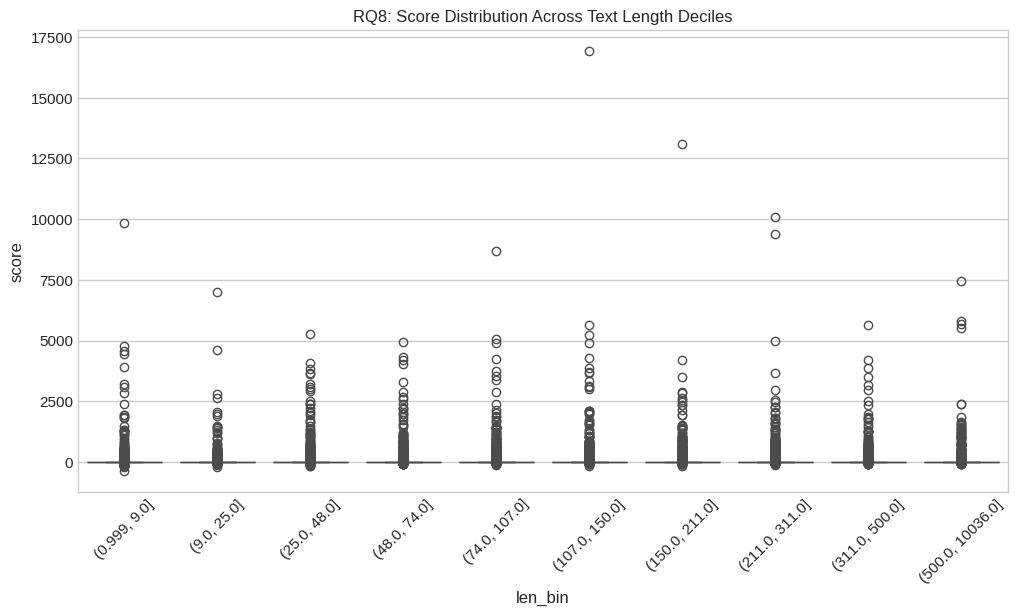

In [49]:
df["len_bin"] = pd.qcut(df["text_len"], 10)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="len_bin", y="score")
plt.xticks(rotation=45)
plt.title("RQ8: Score Distribution Across Text Length Deciles")
plt.show()

### 9. How did the balance of topics change over time?

<Figure size 1200x600 with 0 Axes>

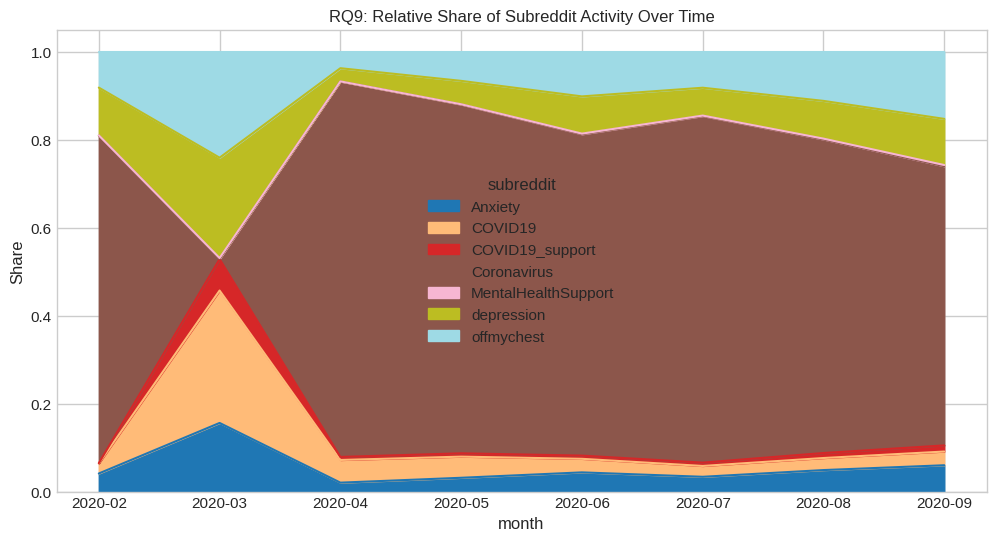

In [50]:
topic_month = df.groupby(["month","subreddit"])["id"].count().reset_index()
pivot = topic_month.pivot(index="month", columns="subreddit", values="id").fillna(0)
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
pivot_norm.plot(kind="area", figsize=(12,6), colormap="tab20")
plt.title("RQ9: Relative Share of Subreddit Activity Over Time")
plt.ylabel("Share")
plt.show()

### 10. Which authors are the most active across all mental health topics?

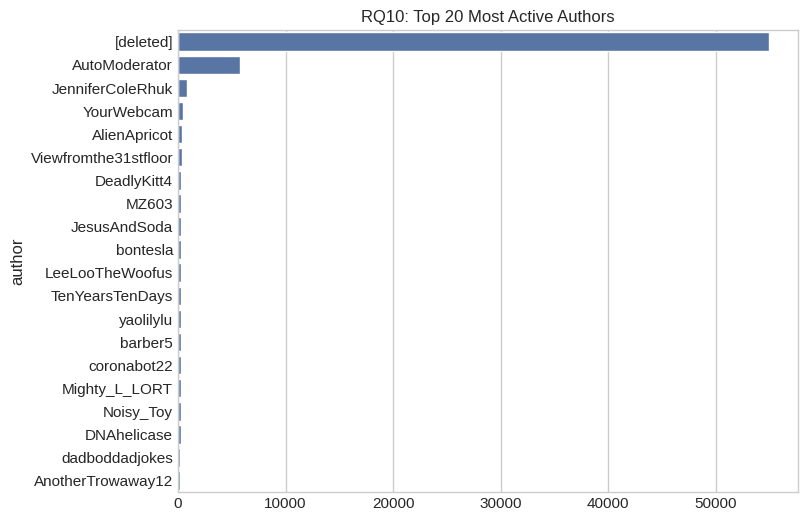

In [51]:
top_authors = df['author'].value_counts().head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("RQ10: Top 20 Most Active Authors")
plt.show()

### 11. Are there temporal patterns within a month? (day-of-month analysis)

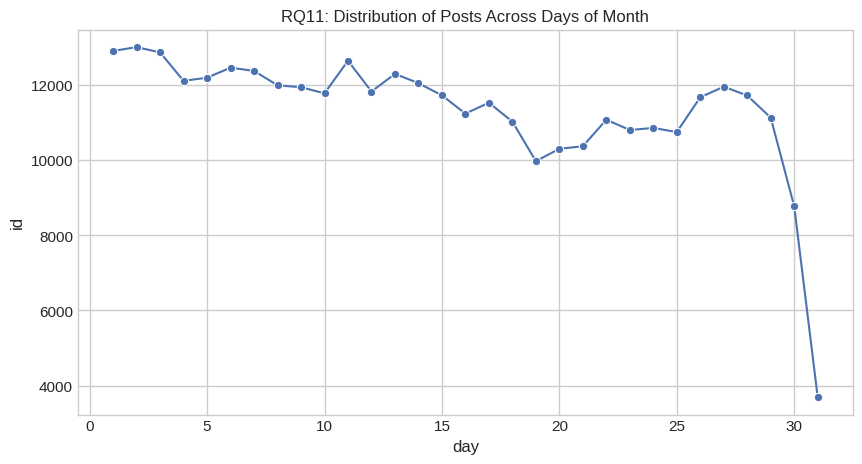

In [52]:
df["day"] = df["created_utc"].dt.day

daily = df.groupby("day")["id"].count().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x="day", y="id", data=daily, marker="o")
plt.title("RQ11: Distribution of Posts Across Days of Month")
plt.show()

### 12. Which subreddits show unusual spikes? (anomaly detection)

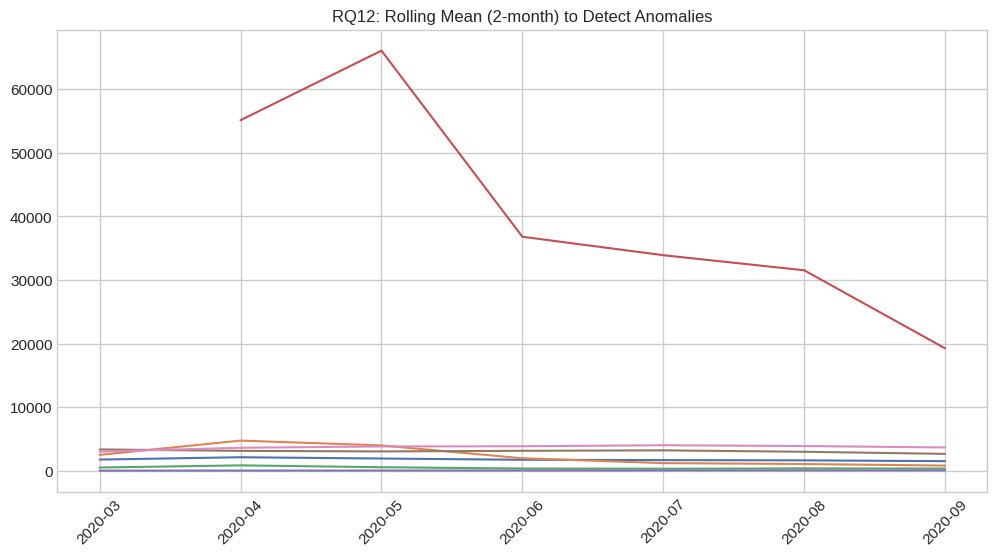

In [53]:
monthly = df.groupby(["month","subreddit"])["id"].count().reset_index()

plt.figure(figsize=(12,6))
for sub, subset in monthly.groupby("subreddit"):
    y = subset["id"]
    y_roll = y.rolling(2, center=True).mean()
    plt.plot(subset["month"], y_roll)

plt.xticks(rotation=45)
plt.title("RQ12: Rolling Mean (2-month) to Detect Anomalies")
plt.show()

### Sentiment per subreddit

In [55]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str):
        return "NEUTRAL"
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "POSITIVE"
    elif score <= -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

df["sentiment"] = df["text"].apply(get_sentiment)
df["sentiment"].value_counts()

,count
sentiment,
POSITIVE,137014
NEGATIVE,107033
NEUTRAL,106919


In [57]:
sent_map = {"NEGATIVE": -1, "NEUTRAL": 0, "POSITIVE": 1}
df["sent_score"] = df["sentiment"].map(sent_map)

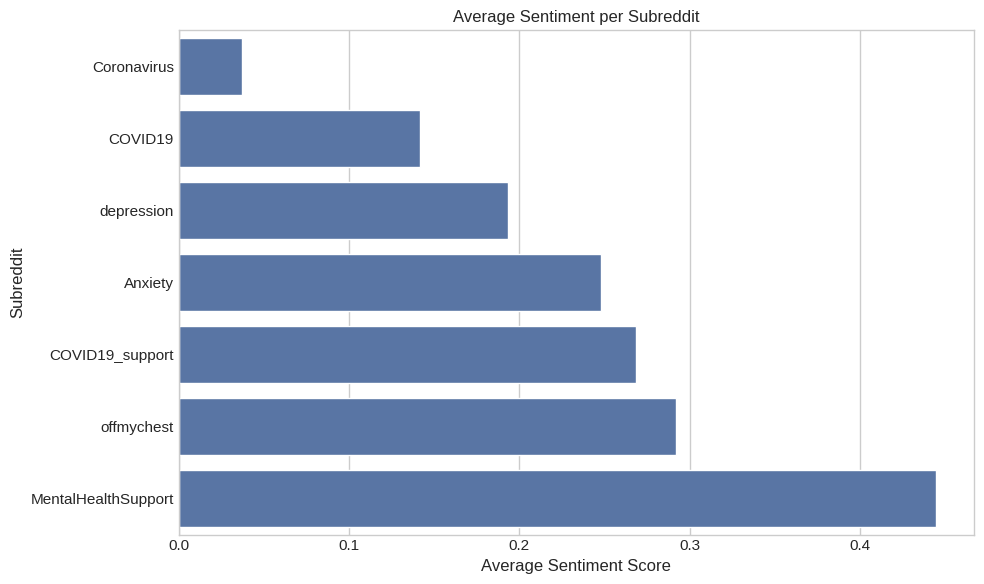

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sent_avg = df.groupby("subreddit")["sent_score"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=sent_avg.sort_values("sent_score"), x="sent_score", y="subreddit")
plt.title("Average Sentiment per Subreddit")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()

Sentiment Analysis Method:
We applied VADER (Valence Aware Dictionary and sEntiment Reasoner), a lexicon-based sentiment classifier optimized for social media text.
For each post, we computed the compound polarity score in range [-1, 1], then mapped:

score ≥ 0.05 → POSITIVE

score ≤ –0.05 → NEGATIVE

otherwise → NEUTRAL

This allowed us to compute average sentiment per subreddit and analyze emotional patterns across communities.